In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tables
tables.file._open_files.close_all()

## Random Seed

In [2]:
from elements import *
from beamline import Beamline
from beam import Bunch

In [14]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]
beam_energy = 10
dim = 4
num_particles = 10000

In [23]:
bunch = Bunch('electron', beam_energy, dim, num_particles, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution(seed=134)
x = particles[0, :]
xp = particles[1, :]

In [24]:
bunch2 = Bunch('electron', beam_energy, dim, num_particles, twiss_x, twiss_y)
particles2 = bunch2.generate_transverse_matched_beam_distribution(seed=12234)
nx = particles2[0,:]
nxp = particles2[1,:]

In [25]:
print (x)
print (nx)

[ 0.00216015 -0.00812904  0.00675663 ... -0.00112552  0.00231338
  0.01269594]
[-0.00321557  0.00980059 -0.004711   ...  0.00554052 -0.00506507
  0.0063134 ]


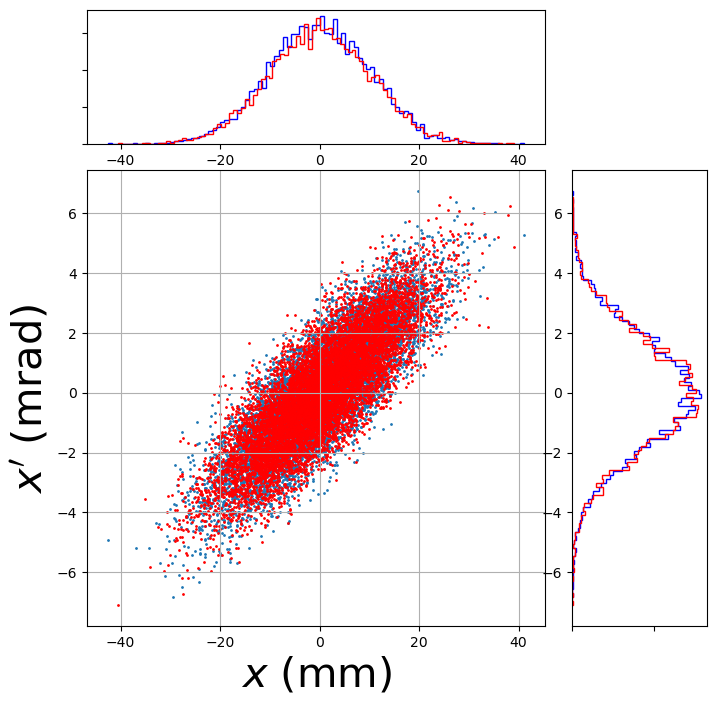

In [26]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Update Twiss Parameters

In [42]:
d1 = Drift("d1", "drift", 5) #, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2) #, aperture=['circular', 5e-2])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2) #, aperture=['circular', 5e-2])
m1 = Marker("m1", "marker") #, aperture=['circular', 1e-1])

In [43]:
fodo_list = [qf, d1, qd, d1, m1]

In [44]:
fodo = Beamline("fodo", fodo_list)

In [45]:
fodo.get_num_beamline_elements()

5

In [46]:
fodo.print_beamline()

   qf quadrupole  0.400  1.200  0.400
   d1      drift  5.000  0.000  5.400
   qd quadrupole  0.400 -1.200  5.800
   d1      drift  5.000  0.000 10.800
   m1     marker  0.000  0.000 10.800


In [47]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [48]:
particles = bunch.generate_transverse_matched_beam_distribution()
x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [49]:
bunch.twiss_x

[-1.5, 10, 1.0052054042219133e-05]

In [50]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1.0052054042219133e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 1.0157430617419443e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [51]:
fodo.propagate_beamline(bunch)

         0         qf quadrupole    0.40000    0.40000      10000/     10000   10.05205   10.15743
         1         d1      drift    5.00000    5.40000      10000/     10000   10.05205   10.15743
         2         qd quadrupole    0.40000    5.80000      10000/     10000   10.05205   10.15743
         3         d1      drift    5.00000   10.80000      10000/     10000   10.05205   10.15743
         4         m1     marker    0.00000   10.80000      10000/     10000   10.05205   10.15743


In [52]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 244.02683540767742 m
alpha_x                   : -38.42939226775982 m^(1/2)
emittance_x               : 1.0052054042217905e-05 mm-mrad
beta_y                    : 48.813709554289034 m
alpha_y                   : -21.33254176263737 m^(1/2)
emittance_y               : 1.0157430617419346e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 10.8


In [53]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [54]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 244.02683540767742 m
alpha_x                   : -38.42939226775982 m^(1/2)
emittance_x               : 1.0052054042217905e-05 mm-mrad
beta_y                    : 48.813709554289034 m
alpha_y                   : -21.33254176263737 m^(1/2)
emittance_y               : 1.0157430617419346e-05 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 10.8


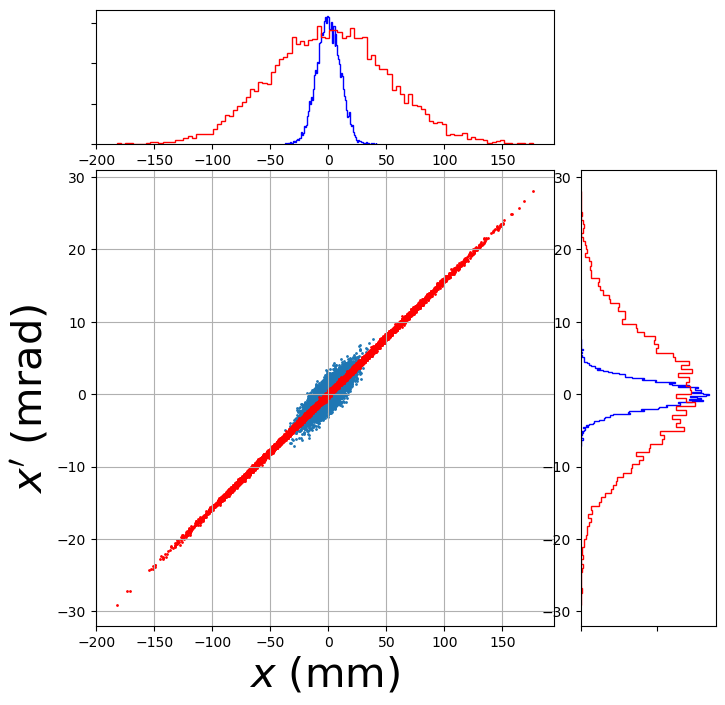

In [55]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

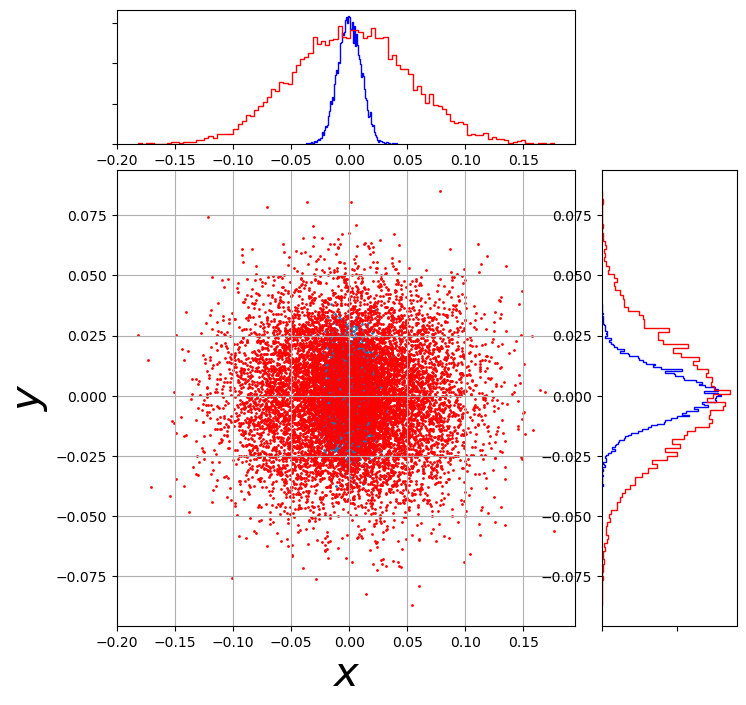

In [56]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

## Diagnostics

### Particle Diagnostics

In [57]:
import tables
import numpy as np
import os
from matplotlib import pyplot as plt

In [58]:
from elements import *
from beamline import Beamline
from beam import Bunch
from utils import diagnostics

In [59]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [60]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [61]:
if os.path.exists("particle.h5"):
    os.remove("particle.h5")

In [62]:
pdiagnostics = diagnostics.Particle_diagnostics("particle.h5")

In [63]:
pdiagnostics.save_particle_diagnostics(bunch.particle)

In [68]:
h5file = tables.open_file("particle.h5")

In [69]:
h5file.root.particle

/particle (Group) 'particle data'
  children := ['beta' (Array), 'charge' (Array), 'energy' (Array), 'gamma' (Array), 'mass' (Array), 'momentum' (Array), 'species' (Array)]

In [70]:
for i in h5file.root.particle:
    if i.name == "species":
        print ("%10s %10s" % (i.name, i.read()[0])) #.decode('ASCII')))
    else:
        print ("%10s %10.5f" % (i.name, i.read()))

      beta    0.99882
    charge   -1.00000
    energy   10.00000
     gamma   20.56951
      mass    0.51100
  momentum    9.98694
   species b'electron'


In [71]:
h5file.close()

### Bunch Diagnostics

In [72]:
if os.path.exists("bunch.h5"):
    os.remove("bunch.h5")

In [73]:
bdiagnostics = diagnostics.Bunch_diagnostics("bunch.h5")

In [74]:
bdiagnostics.save_bunch_diagnostics(bunch)

In [75]:
h5file = tables.open_file("bunch.h5")

In [76]:
h5file.root

/ (RootGroup) 'Bunch Data'
  children := ['diagnostics' (Group), 'twiss' (Group), 'particles' (Array)]

In [77]:
h5file.root.particles.read()

array([[-4.72780416e-03,  5.97862602e-03,  7.31554137e-03, ...,
        -1.16365590e-02, -7.43340914e-03,  7.24845243e-03],
       [-1.00753093e-03,  2.62840288e-04,  1.60503185e-03, ...,
        -1.27152550e-03, -1.53115095e-03,  8.94935590e-04],
       [-3.29626267e-03, -2.55364865e-03,  1.03458788e-02, ...,
         1.68636336e-02, -9.27983466e-03,  3.30090928e-03],
       [ 6.50074704e-05, -4.44207099e-04, -3.16440281e-03, ...,
        -2.69512032e-03,  1.41996267e-03, -6.26785445e-04]])

In [78]:
h5file.root.diagnostics

/diagnostics (Group) 'Bunch diagnostics data'
  children := ['num_particles' (Array), 'std_x' (Array), 'std_xp' (Array), 'std_y' (Array), 'std_yp' (Array)]

In [79]:
for i in h5file.root.diagnostics:
    print ("%12s %10.5f" % (i.name, i.read()))

num_particles 10000.00000
       std_x    0.01000
      std_xp    0.00180
       std_y    0.01004
      std_yp    0.00181


In [80]:
h5file.root.twiss

/twiss (Group) 'Twiss data'
  children := ['alpha_x' (Array), 'alpha_y' (Array), 'beta_x' (Array), 'beta_y' (Array), 'emit_x' (Array), 'emit_y' (Array)]

In [81]:
for i in h5file.root.twiss:
    print ("%12s %10.5f" % (i.name, i.read()))

     alpha_x   -1.50000
     alpha_y    1.50000
      beta_x   10.00000
      beta_y   10.00000
      emit_x    0.00001
      emit_y    0.00001


In [82]:
h5file.close()

## Beamline Diagnostics

In [83]:
from elements import *
from beamline import Beamline
from beam import Bunch
from matplotlib import pyplot as plt
from utils import diagnostics
import os
from tables import *

In [84]:
if os.path.exists("beamline.h5"):
    os.remove("beamline.h5")

In [85]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [86]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [87]:
d1 = Drift("d1", "drift", 5, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.5, 22.5, aperture=['circular', 1e-1])
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2, aperture=['circular', 1e-1])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2, aperture=['circular', 1e-1])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [88]:
fodo_list = [qf, d1, b1, d1, qd, d1, b1, d1, m1]

In [89]:
fodo = Beamline("fodo", fodo_list)

In [90]:
bldiagnostics = diagnostics.Beamline_diagnostics("beamline.h5")

In [91]:
bldiagnostics

In [92]:
bldiagnostics.save_bunch_diagnostics(bunch)

In [93]:
h5file = open_file("beamline.h5")

In [94]:
h5file.root

/ (RootGroup) 'Beamline Data'
  children := ['beamline' (Group), 'diagnostics' (Group), 'twiss' (Group)]

In [95]:
h5file.root.beamline.s

/beamline/s (EArray(1,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192,)

In [96]:
for i in h5file.root.beamline.s:
    print (i)

0.0


In [97]:
h5file.close()

### Beamline Test

In [98]:
if os.path.exists("beamline.h5"):
    os.remove("beamline.h5")

In [99]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [100]:
particles = bunch.generate_transverse_matched_beam_distribution()

In [101]:
fodo2 = Beamline("fodo", fodo_list, True)

In [102]:
fodo2.propagate_beamline(bunch)

         0         qf quadrupole    0.40000    0.40000      10000/     10000   10.05205   10.15743
         1         d1      drift    5.00000    5.40000       9994/     10000   10.05119   10.11987
         2         b1      sbend    1.50000    6.90000       9974/     10000   10.04872   10.02384
         3         d1      drift    5.00000   11.90000       9436/     10000    9.88505    8.73003
         4         qd quadrupole    0.40000   12.30000       9428/     10000    9.84939    8.72732
         5         d1      drift    5.00000   17.30000       5672/     10000    4.99132    7.74808
         6         b1      sbend    1.50000   18.80000       3955/     10000    4.34292    5.52853
         7         d1      drift    5.00000   23.80000       1847/     10000    3.67515    2.70465
         8         m1     marker    0.00000   23.80000       1847/     10000    3.67515    2.70465


In [103]:
h5file = open_file("beamline.h5")

In [104]:
h5file.root

/ (RootGroup) 'Beamline Data'
  children := ['beamline' (Group), 'diagnostics' (Group), 'twiss' (Group)]

In [105]:
h5file.root.beamline.s

/beamline/s (EArray(10,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192,)

In [106]:
for i in h5file.root.beamline.s:
    print (i)

0.0
0.4
5.4
6.9
11.9
12.3
17.3
18.8
23.8
23.8


In [107]:
for i in h5file.root.twiss.emit_x:
    print (i)

1.0052054042219133e-05
1.005205404221913e-05
1.005118619534663e-05
1.0048716905865297e-05
9.885054252583011e-06
9.849392941215936e-06
4.99131662973157e-06
4.342923236543308e-06
3.675152380947092e-06
3.675152380947092e-06


In [108]:
for i in h5file.root.twiss.beta_x:
    print (i)

10.0
9.300724614618339
7.055530318067579
15.763887749415067
58.12781715086643
75.24321923724224
1001.2668133387202
1292.3593278285514
1707.3766328751396
1707.3766328751396


In [109]:
h5file.root.twiss.beta_x

/twiss/beta_x (EArray(10,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192,)

In [110]:
h5file.close()

## FODO Lattice Benchmarking

In [111]:
if os.path.exists("beamline.h5"):
    os.remove("beamline.h5")

In [112]:
d1 = Drift("d1", "drift", 0.55) #, aperture=['circular', 1e-1])
b1 = Sbend("b1", "sbend", 1.50, 22.5)
qf = Quadrupole("qf", "quadrupole", 0.4, 1.2) #, aperture=['circular', 5e-2])
qd = Quadrupole("qd", "quadrupole", 0.4, -1.2) #, aperture=['circular', 5e-2])
m1 = Marker("m1", "marker", aperture=['circular', 1e-1])

In [113]:
fodo_list = [qf, d1, b1, d1, qd, d1, b1, d1, m1]

In [114]:
fodo = Beamline("fodo", fodo_list, True)

In [115]:
fodo.get_num_beamline_elements()

9

In [116]:
fodo.print_beamline()

   qf quadrupole  0.400  1.200  0.400
   d1      drift  0.550  0.000  0.950
   b1      sbend  1.500 22.500  2.450
   d1      drift  0.550  0.000  3.000
   qd quadrupole  0.400 -1.200  3.400
   d1      drift  0.550  0.000  3.950
   b1      sbend  1.500 22.500  5.450
   d1      drift  0.550  0.000  6.000
   m1     marker  0.000  0.000  6.000


In [117]:
twiss_x = [0, 9.818144678, 3.4187e-6]
twiss_y = [0, 1.237442734, 3.4187e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)

In [118]:
particles = bunch.generate_transverse_matched_beam_distribution()
x = particles[0,:]
xp = particles[1,:]
y = particles[2,:]

In [119]:
bunch.twiss_x

[0, 9.818144678, 3.4581275711323833e-06]

In [120]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 9.818144678 m
alpha_x                   : 0 m^(1/2)
emittance_x               : 3.4581275711323833e-06 mm-mrad
beta_y                    : 1.237442734 m
alpha_y                   : 0 m^(1/2)
emittance_y               : 3.45119143262139e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [121]:
fodo.propagate_beamline(bunch)

         0         qf quadrupole    0.40000    0.40000      10000/     10000    3.45813    3.45119
         1         d1      drift    0.55000    0.95000      10000/     10000    3.45813    3.45119
         2         b1      sbend    1.50000    2.45000      10000/     10000    3.45813    3.45119
         3         d1      drift    0.55000    3.00000      10000/     10000    3.45813    3.45119
         4         qd quadrupole    0.40000    3.40000      10000/     10000    3.45813    3.45119
         5         d1      drift    0.55000    3.95000      10000/     10000    3.45813    3.45119
         6         b1      sbend    1.50000    5.45000      10000/     10000    3.45813    3.45119
         7         d1      drift    0.55000    6.00000      10000/     10000    3.45813    3.45119
         8         m1     marker    0.00000    6.00000      10000/     10000    3.45813    3.45119


In [122]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 56.6332681990393 m
alpha_x                   : -13.732740061298799 m^(1/2)
emittance_x               : 3.4581275711324113e-06 mm-mrad
beta_y                    : 3.79647620950149 m
alpha_y                   : 1.3753018062484874 m^(1/2)
emittance_y               : 3.4511914326213897e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 6.0


In [123]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

In [124]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 56.6332681990393 m
alpha_x                   : -13.732740061298799 m^(1/2)
emittance_x               : 3.4581275711324113e-06 mm-mrad
beta_y                    : 3.79647620950149 m
alpha_y                   : 1.3753018062484874 m^(1/2)
emittance_y               : 3.4511914326213897e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 6.0


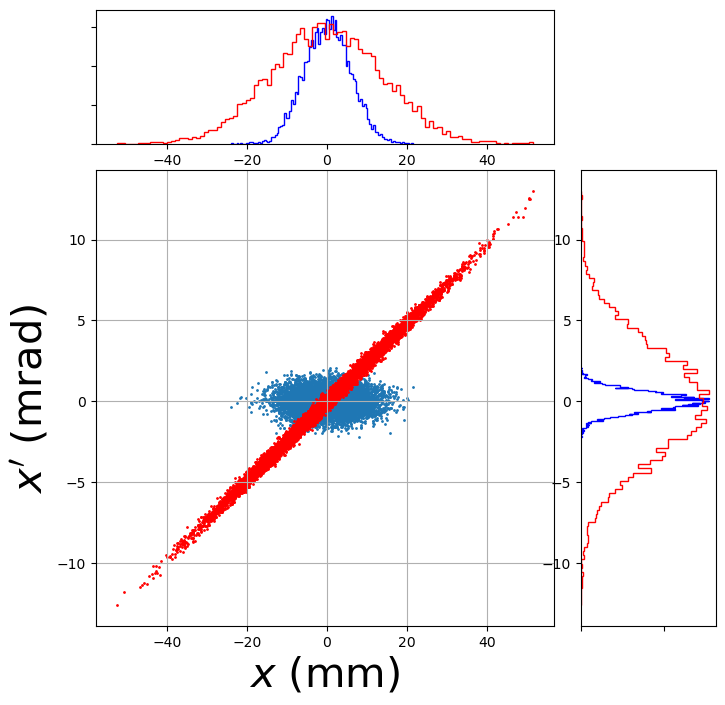

In [125]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

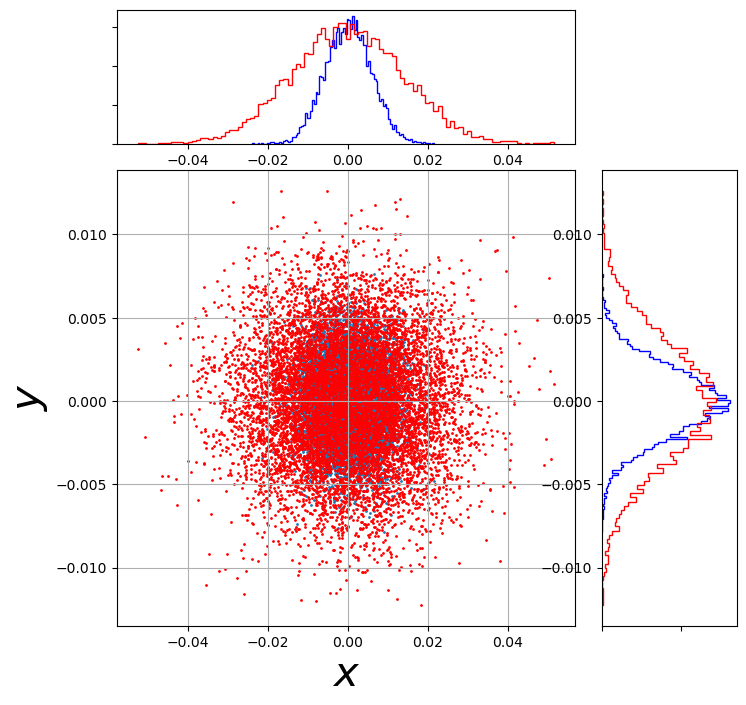

In [126]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

### FODO Lattice Benchmarking with Synergia2

In [127]:
h5file = tables.open_file("syn_particles_0000.h5")

In [128]:
syn_particles_x = h5file.root.particles[:,0]
syn_particles_xp = h5file.root.particles[:,1]
syn_particles_y = h5file.root.particles[:,2]

In [129]:
h5file.close()

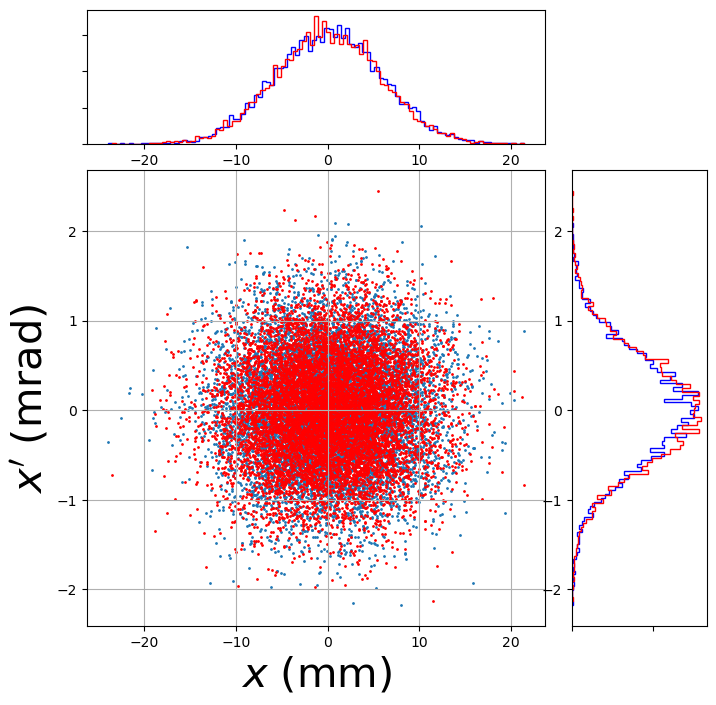

In [130]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(syn_particles_x*1e3, syn_particles_xp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(syn_particles_x*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(syn_particles_xp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

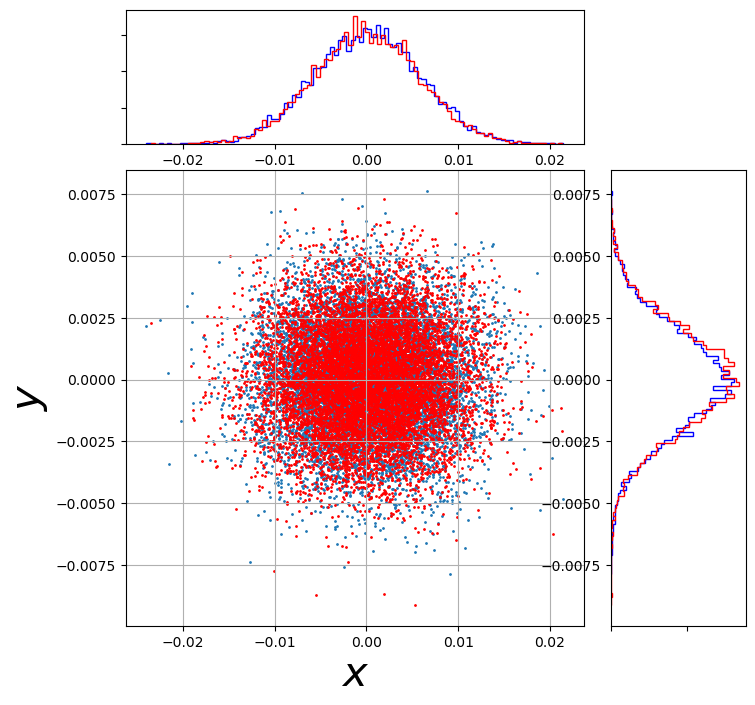

In [131]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(syn_particles_x, syn_particles_y, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(syn_particles_x, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(syn_particles_y, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

In [132]:
h5file = open_file("beamline.h5")

In [133]:
h5file.root

/ (RootGroup) 'Beamline Data'
  children := ['beamline' (Group), 'diagnostics' (Group), 'twiss' (Group)]

In [134]:
s = []
for i in h5file.root.beamline.s:
    s.append(i)
std_x = []
for i in h5file.root.diagnostics.std_x:
    std_x.append(i)
std_y = []
for i in h5file.root.diagnostics.std_y:
    std_y.append(i)
beta_x = []
for i in h5file.root.twiss.beta_x:
    beta_x.append(i)
h5file.close()

In [135]:
h5file = tables.open_file("syn_diagnostics.h5")
syn_s = h5file.root.s_n[:]
syn_x = h5file.root.std[0,:]
syn_y = h5file.root.std[2,:]
h5file.close()

In [136]:
print (len(syn_s), len(syn_x), len(syn_y))

9 9 9


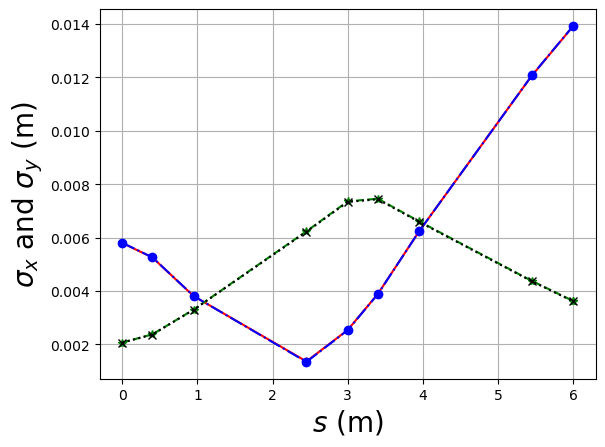

In [137]:
plt.figure(1)

plt.plot(s, std_x, 'r*-')
plt.plot(s, std_y, 'g*--')
plt.plot(syn_s, syn_x, 'bo-.')
plt.plot(syn_s, syn_y, 'kx:')
plt.xlabel(r"$s$ (m)", fontsize=20)
plt.ylabel(r"$\sigma_{x}$ and $\sigma_{y}$ (m)", fontsize=20)
plt.grid(1)
plt.show()

In [138]:
h5file = tables.open_file("syn_twiss.h5")
syn_s = h5file.root.s[:]
syn_beta_x = h5file.root.beta_x[:]
h5file.close()

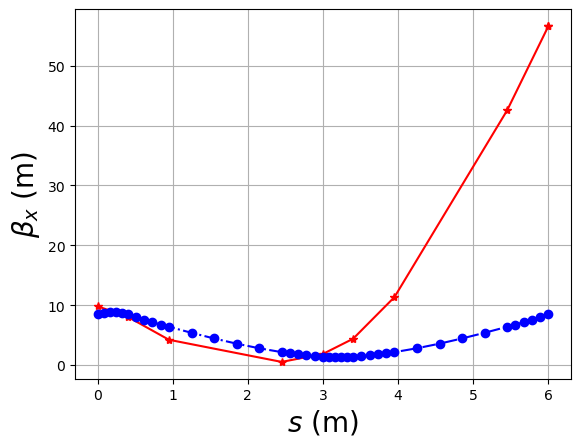

In [139]:
plt.figure(1)

plt.plot(s, beta_x, 'r*-')
plt.plot(syn_s, syn_beta_x, 'bo-.')
plt.xlabel(r"$s$ (m)", fontsize=20)
plt.ylabel(r"$\beta_{x}$ (m)", fontsize=20)
plt.grid(1)
plt.show()

## RF Cavity

### Transfer Matrix of an RF Cavity

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tables
tables.file._open_files.close_all()

In [2]:
from elements import *
from beamline import Beamline
from beam import Bunch

In [3]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [4]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 1.0220056434289388e-05 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.934760880702392e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [5]:
rfcavity = Rfcavity("rfcav", "rfcavity", length=0.5, strength=10, phase=80) #, freq=3e9)

In [6]:
rfcavity.get_element_property("phase") * 180 / np.pi

The element's phase is 1.3962634015954636


80.0

In [7]:
rfcavity.get_transfer_matrix(bunch)

10 11.736481776669304
20.569511835591836 23.967721903673784
20.569511835591836 23.967721903673784


array([[ 0.9669749 ,  0.02835265,  0.        ,  0.        ],
       [-0.3872258 ,  0.87617409,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.9669749 ,  0.02835265],
       [ 0.        ,  0.        , -0.3872258 ,  0.87617409]])

In [26]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.768033473781249e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.995438238938392e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 20.0 MeV
particle momentum         : 19.99347093611059 MeV/c
particle gamma            : 40.13902367118367
particle beta             : 0.9996896128022548
particle s                : 0


In [27]:
twiss_x = [-1.5, 10, 10e-6]
twiss_y = [1.5, 10, 10e-6]

bunch = Bunch('electron', 10, 4, 10000, twiss_x, twiss_y)
particles = bunch.generate_transverse_matched_beam_distribution()

x = particles[0, :]
xp = particles[1, :]
y = particles[2, :]

In [28]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 10 m
alpha_x                   : -1.5 m^(1/2)
emittance_x               : 9.768033473781249e-06 mm-mrad
beta_y                    : 10 m
alpha_y                   : 1.5 m^(1/2)
emittance_y               : 9.995438238938392e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 10 MeV
particle momentum         : 9.98693546955716 MeV/c
particle gamma            : 20.569511835591836
particle beta             : 0.9988175606506312
particle s                : 0


In [29]:
rfcavity.propagate(bunch)

10 20.0
20.569511835591836 40.13902367118367
20.569511835591836 40.13902367118367


In [30]:
bunch.print_bunch_properties()

number of macro particles : 10000
beta_x                    : 8.74302357602848 m
alpha_x                   : -0.5528606736687136 m^(1/2)
emittance_x               : 5.005694253934889e-06 mm-mrad
beta_y                    : 6.781075649770106 m
alpha_y                   : 0.9202418451937224 m^(1/2)
emittance_y               : 5.12222935071971e-06 mm-mrad

particle species          : electron
particle charge           : -1
particle mass             : 0.51099895 MeV/c^2
particle energy           : 20.0 MeV
particle momentum         : 19.99347093611059 MeV/c
particle gamma            : 40.13902367118367
particle beta             : 0.9996896128022548
particle s                : 1.5


In [31]:
new_particles = bunch.state
nx = new_particles[0,:]
nxp = new_particles[1,:]
ny = new_particles[2,:]

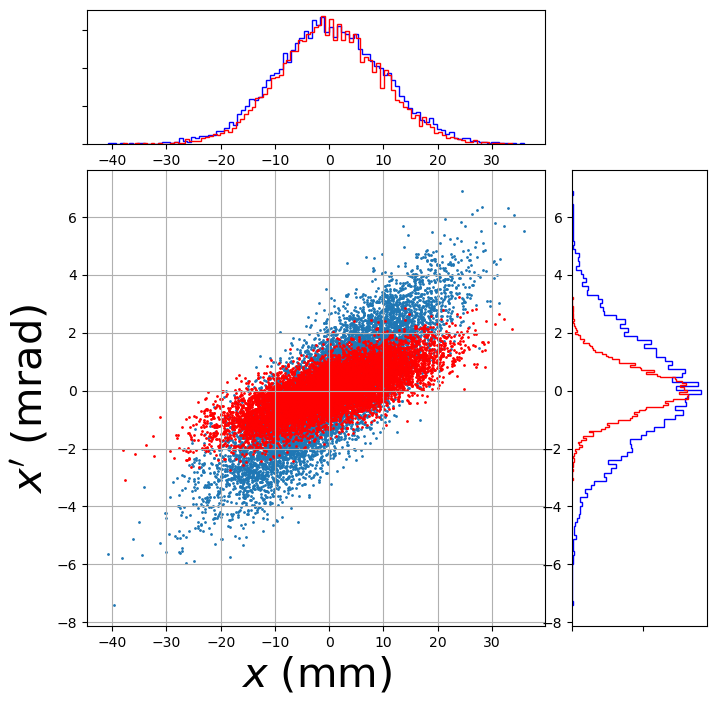

In [32]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x*1e3, xp*1e3, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx*1e3, nxp*1e3, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=30)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x*1e3, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp*1e3, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx*1e3, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(nxp*1e3, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()

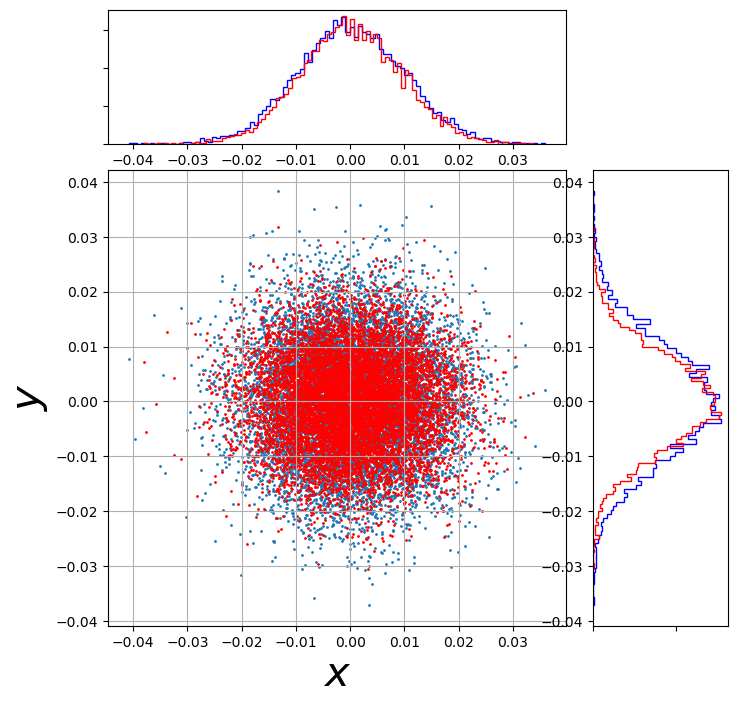

In [33]:
fig = plt.figure(figsize=(8,8))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, y, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.scatter(nx, ny, s=1, c='r')#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$', fontsize=30)
main_ax.set_ylabel(r'$y$', fontsize=30)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(y, 100, histtype='step', orientation='horizontal', color='b')

x_hist.hist(nx, 100, histtype='step', orientation='vertical', color='r')
y_hist.hist(ny, 100, histtype='step', orientation='horizontal', color='r')
        
plt.show()